# 📊 Model Evaluation and Refinement

In this section, we focus on evaluating and improving our regression models to enhance their predictive performance. We'll use techniques to detect overfitting/underfitting, apply regularization, and optimize model hyperparameters.

## 🔍 Objectives

- ✅ Evaluate model performance using **Mean Squared Error (MSE)** and **R² score**
- ✅ Identify and address **overfitting** and **underfitting**
- ✅ Apply **Ridge Regression** to control model complexity
- ✅ Use **Grid Search** to find the optimal hyperparameters

By the end of this section, we'll have a more **robust**, **generalizable**, and **optimized** model ready for evaluation and deployment.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input/cleaned-used-car-datasett'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cleaned-used-car-datasett/cleaned_used_car_dataset.csv


In [3]:
# import and load dataset.
df = pd.read_csv('/kaggle/input/cleaned-used-car-datasett/cleaned_used_car_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km.1,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
3,3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0
4,4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,...,19,25,15250.0,12.368421,9.400000,Low,0,1,1,0


In [5]:
# drop an Unnamed: 0 column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km.1,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,19,25,15250.0,12.368421,9.400000,Low,0,1,1,0


In [6]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km.1,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
1,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
2,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
3,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0
4,2,122,99.8,0.851994,0.920833,0.887960,2507,136,3.19,3.40,...,5500.0,19,25,15250.0,12.368421,9.400000,0,1,1,0


In [7]:
# functions for plotting

In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color='r', label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color='r', label=BlueName , ax = ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()
    

In [9]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

In [10]:
x = df.drop(['price'], axis=1)
y = df['price']

In [11]:
# split data into training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 20
number of training samples: 180


In [12]:
# split data into training and testing data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 80
number of training samples: 120


In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
# create a Linear Regression object
lre = LinearRegression()

In [15]:
# fit model
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [16]:
# calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.5454534032667759

In [17]:
lre.score(x_train[['horsepower']], y_train)

0.6572826747147018

In [18]:
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7055887960619338

## Cross-Validation Score

Cross-validation is a technique to evaluate model performance by splitting the data into several folds. The model is trained and validated multiple times, each on different subsets.

**Cross-Validation Score** is the average performance (e.g., R², MSE) across all folds, giving a more reliable estimate of how the model generalizes to unseen data.

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
Rcross = cross_val_score(lre, x[['horsepower']], y, cv=4)

In [21]:
Rcross

array([0.77474062, 0.5172957 , 0.74777703, 0.04701847])

In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5217079546458682 and the standard deviation is 0.29175431773738775


In [23]:
# neg_mean_squared_error
-1 * cross_val_score(lre,x[['horsepower']], y,cv=4,scoring='neg_mean_squared_error')

array([20648006.60031451, 43733821.19046848, 12543435.01689939,
       17587351.09090061])

In [24]:
Rc = cross_val_score(lre, x[['horsepower']], y, cv=2)
print(f'Rc={Rc}, mean of Rc = {Rc.mean()}')

Rc=[0.59020004 0.44149202], mean of Rc = 0.5158460303046659


In [25]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x[['horsepower']], y,cv=4)
yhat[0:5]

array([14142.23793549, 20815.3029844 , 12745.549902  , 14762.9881726 ,
       13987.05037621])

## 📉 Overfitting, Underfitting, and Model Selection

### 🎯 Underfitting
- The model is **too simple** to capture the underlying patterns.
- Poor performance on both training and testing data.
- Example: Using linear regression on non-linear data.

### 🚨 Overfitting
- The model is **too complex**, capturing noise along with patterns.
- High training accuracy, but poor generalization on test data.
- Example: Very high-degree polynomial regression.

### ✅ Good Fit (Generalization)
- Balanced model that performs well on both training and test sets.
- Captures the true structure without memorizing noise.

In [26]:
lr = LinearRegression()

In [27]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'highway-L/100km.1',
       'diesel', 'gas', 'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [28]:
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_train)

LinearRegression()

In [29]:
yhat_train= lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

In [30]:
yhat_train

array([ 7262.8602918 ,   765.64454918, 34524.77168752,  6561.23620348,
        6079.9335172 , 15357.98438837, 10106.52740194,  4956.05673828,
       18657.72772625, 18793.33430155,  5553.35396437, 16019.78198124,
       19190.97470755,  7247.75075188, 21433.373049  , 22465.83141469,
       21880.6345662 ,  5843.83083792, 38087.19117341, 11775.73132118,
       18202.03906008, 14333.29509853, 16515.59118108, 27771.25836985,
       11098.96538912,  5502.91298893,  5702.88060692, 11148.39155437,
        9337.64067447, 25340.53266388, 23422.81930079, 25131.04277837,
       11821.68071649,  7286.66596061,  6413.21288051,  7262.03415317,
        9555.95257437, 18663.35227531, 17084.94802245, 10192.1575827 ,
        5791.36293837, 29804.07557642, 18898.07924431, 12589.97217455,
        5701.99074787, 15417.97016649, 13462.40768918, 15183.32870947,
        5577.15963318, 24361.54467358, 10549.05014741, 11790.17749379,
       10418.87285389,  7319.9814432 , 16186.4216629 , 18362.33541796,
      

In [31]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


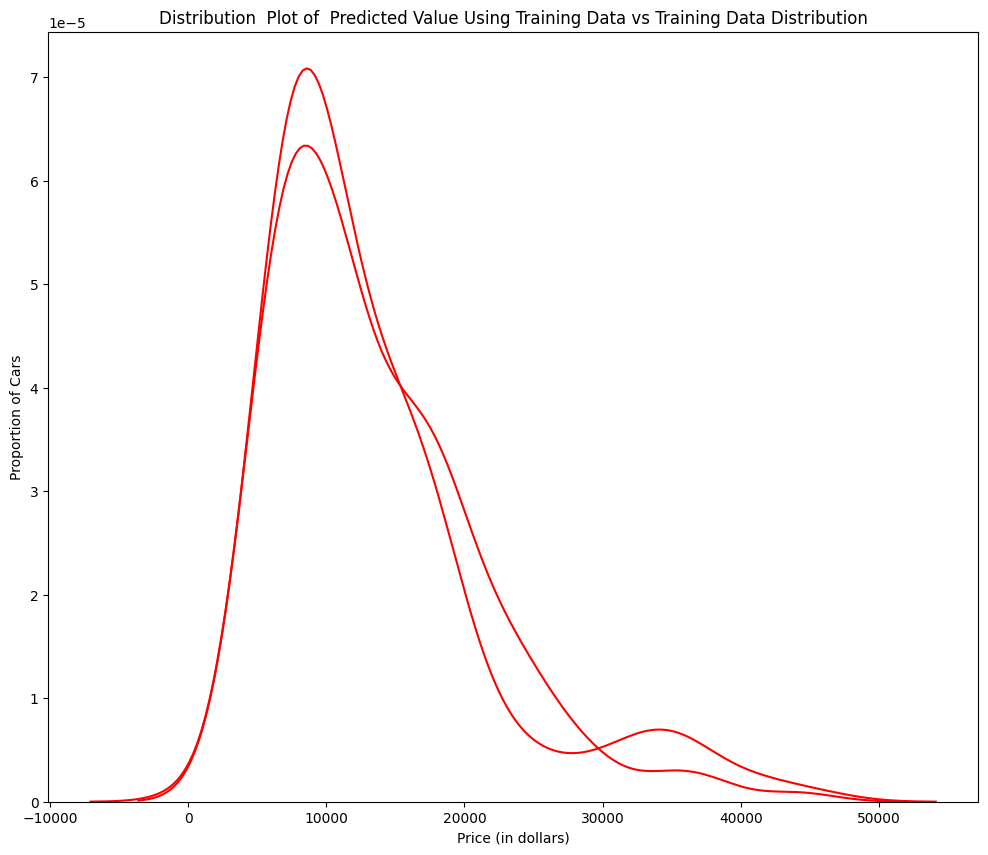

In [32]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


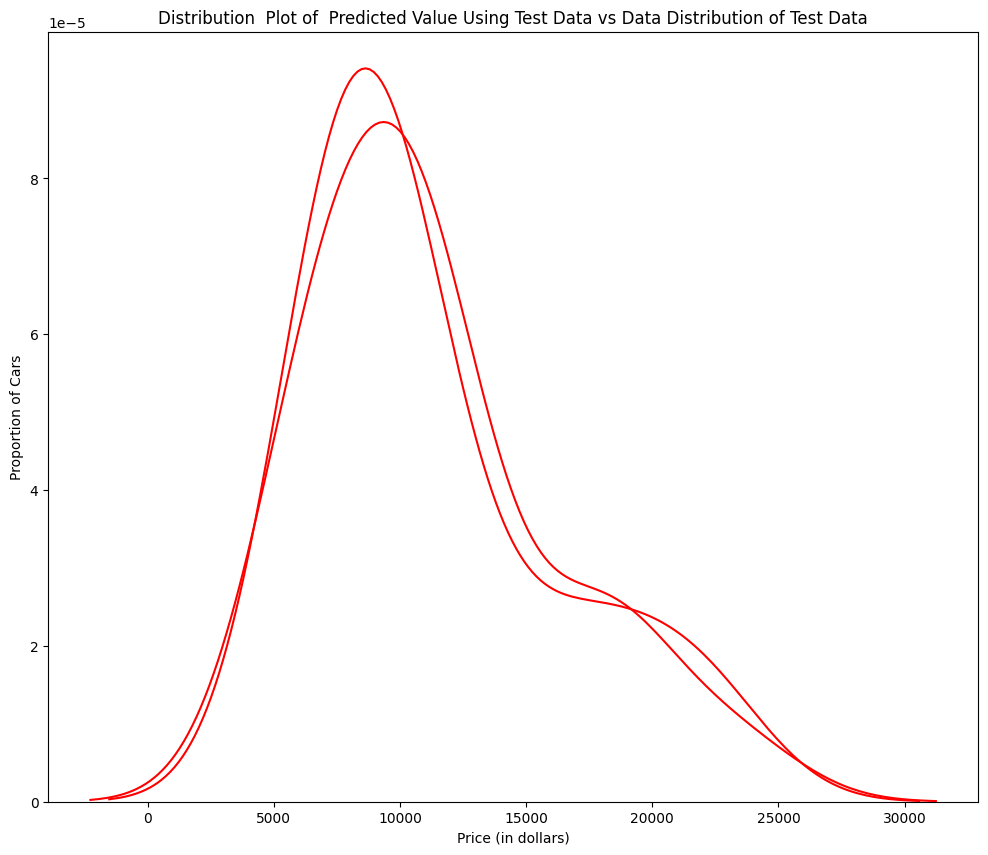

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## Overfitting

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=0)

In [36]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [37]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [38]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 7194.64532127, 10350.08573024, 10991.64698157, 18578.75567134,
        3260.97794348])

In [39]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7194.64532127 10350.08573024 10991.64698157 18578.75567134]
True values: [ 6575.  9988. 15580. 14399.]


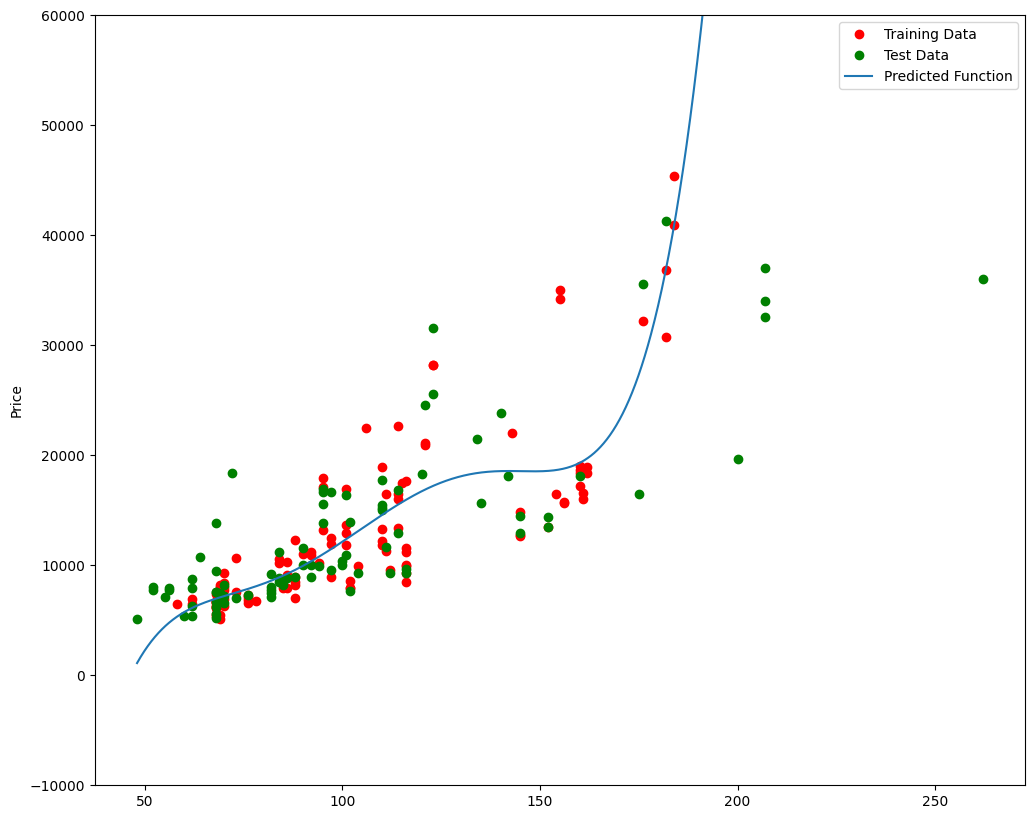

In [40]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [41]:
poly.score(x_train_pr, y_train)

0.7507740781647028

In [42]:
poly.score(x_test_pr, y_test)

-405.1893837413098

Text(3, 0.75, 'Maximum R^2 ')

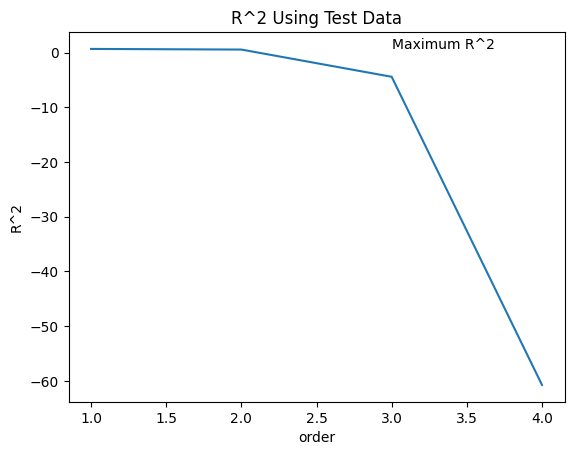

In [43]:
Rsqu_test = []
order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree= n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr,y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))


plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    


In [44]:
pr1 = PolynomialFeatures(degree=2)

In [45]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'highway-L/100km.1',
       'diesel', 'gas', 'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [46]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight','engine-size','highway-L/100km']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight','engine-size','highway-L/100km']])

In [47]:
x_train_pr1.shape

(110, 15)

In [48]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

In [49]:
yhat_test = poly1.predict(x_test_pr1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


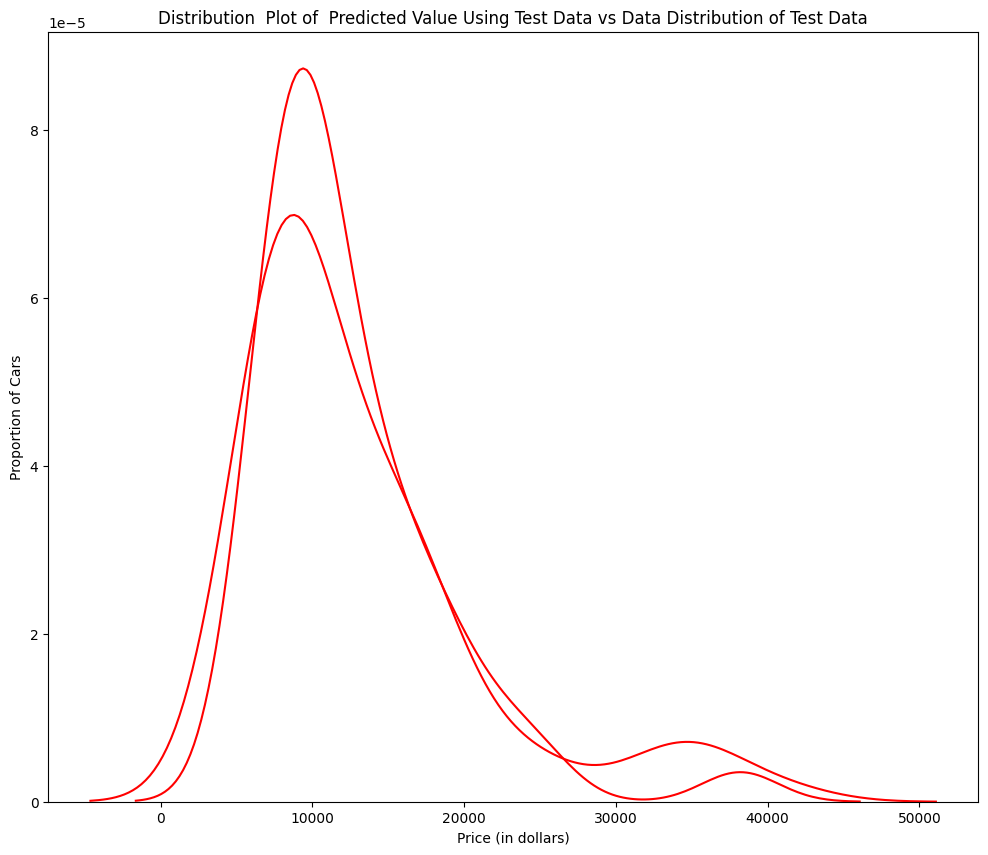

In [50]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])

## 📘 Ridge Regression 

Ridge Regression is a regularized version of linear regression that adds a penalty term to reduce model complexity and prevent overfitting.

- **Alpha (α)** controls the strength of regularization:
  - Low α → less penalty → more flexible model
  - High α → more penalty → simpler model

In this notebook, we use the **test set as validation data** to observe how different alpha values affect performance.


In [52]:
from sklearn.linear_model import Ridge

In [53]:
RigeModel=Ridge(alpha=1)

In [54]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [55]:
yhat = RigeModel.predict(x_test_pr)

In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6174.27054725  9828.91450275 11688.80308903 24124.46648394]
test set : [ 6575.  9988. 15580. 14399.]


In [57]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:03<00:00, 263.01it/s, Test Score=0.622, Train Score=0.9]


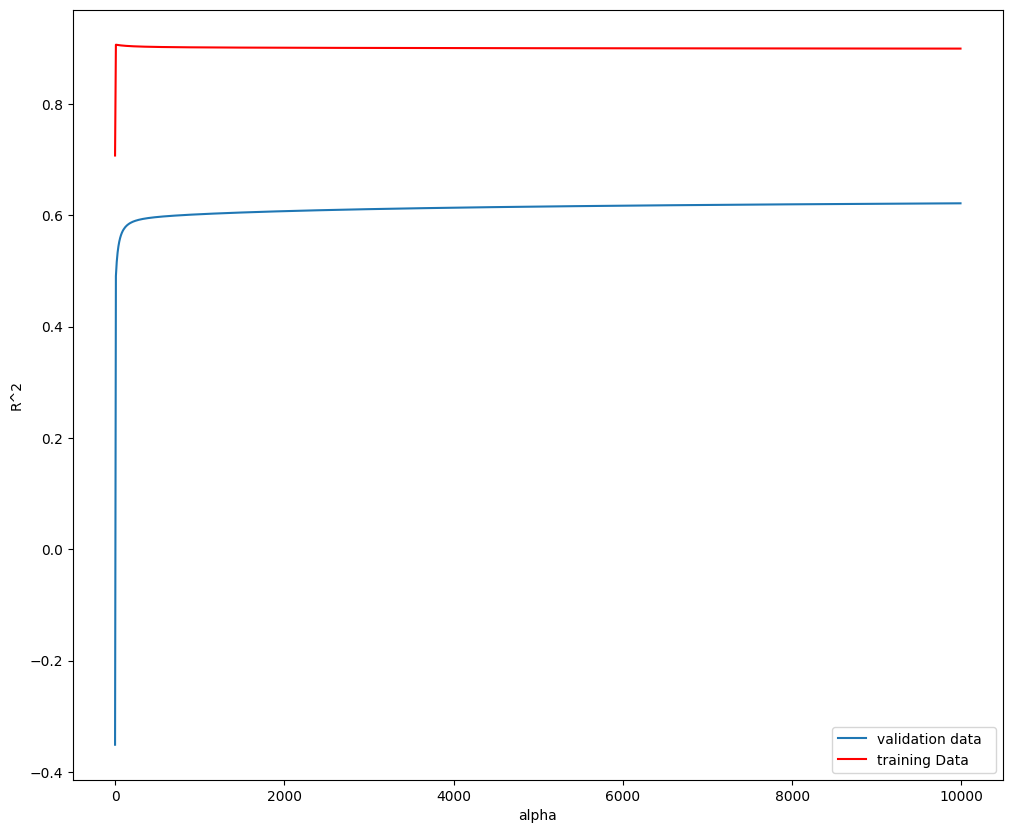

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [59]:
RigeModel = Ridge(alpha = 10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.4910643162749998

## 🔍 Grid Search 

`GridSearchCV` helps find the best hyperparameter (like `alpha` in Ridge Regression) by testing multiple values with cross-validation. It automates model tuning for better performance.


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]

In [62]:
RR = Ridge()
RR

Ridge()

In [63]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [64]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'highway-L/100km.1',
       'diesel', 'gas', 'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [65]:
Grid1.fit(x[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [66]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [67]:
BestRR.score(x[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y)

0.8087430478736107

In [68]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y)

Ridge(alpha=10000)

In [69]:
best= Grid2.best_estimator_
best

Ridge(alpha=10000)

In [70]:
best.score(x[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y)

0.8087430478736107